In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import sklearn

In [2]:
times_list = [str(3600 * (i + 1)) for i in range(6)]
area_one_length = 9

In [3]:
from collections import namedtuple
ARGS_FOR_LIST = namedtuple('FOR_LIST', ('dir', 'ratio', 'seed', 'csv'))

def get_for_list():
    dir_list = ['p10000', 'p20000', 'p30000']
    ratio_list = ['r4', 'r5', 'r6']
    seed_list = ['s'+str(123 + i) for i in range(1)]
    csv_list = ['census', 'mobile']

    return ARGS_FOR_LIST(dir_list, ratio_list, seed_list, csv_list)

In [4]:
def get_read_path(name):
    path = '/Users/kessapassa/OneDrive/research_log/20190331/' + name + '/'
    return path

def get_file_name(args):
    return args.dir + args.ratio + args.seed + '_' + args.csv + '.csv'

def get_full_path(name, args):
    return get_read_path(name) + get_file_name(args)

In [5]:
def for_default_init(func, array):
    for_list = get_for_list()
    
    for _dir in for_list.dir:
        array[_dir] = {}
        
        for _ratio in for_list.ratio:
            array[_dir][_ratio] = {}
            
            for _seed in for_list.seed:
                array[_dir][_ratio][_seed] = {}
                
                for _csv in for_list.csv:
                    array[_dir][_ratio][_seed][_csv] = {}
                    args = ARGS_FOR_LIST(_dir, _ratio, _seed, _csv)
                    func(args, array)

In [6]:
csv_array = {}
def main(args, array):
    df = pd.read_csv(get_full_path('2D', args), 
                     encoding='Shift_JISx0213')
    array[args.dir][args.ratio][args.seed][args.csv] = df

for_default_init(main, csv_array)

In [57]:
people = 'p20000'
ratio = 'r6'
seed = 's123'

# 全体の回帰直線

y =             2
-0.003067 x + 3.221 x + 2.251
相関 =  0.8817842746942568
R^2 =  -1.0627883501243196


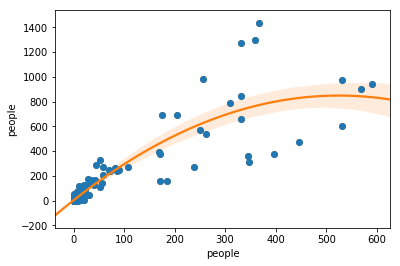

In [58]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
import seaborn as sns

df = csv_array[people][ratio][seed].copy()
trainX = df['mobile']['people'] 
trainY = df['census']['people']

# plt.figure(dpi=600)
plt.xlabel('モバイル空間統計')
plt.ylabel('道路交通センサス')
plt.plot(trainX, trainY, 'o')

order=2
sns.regplot(x=trainX, y=trainY, order=order, ci=75)
z = np.polyfit(trainX, trainY, order)
z = np.squeeze(z)
p = np.poly1d(z)
print('y = ', p)
print('相関 = ', np.corrcoef(trainX, trainY)[0,1])
print('R^2 = ', r2_score(trainX, trainY))
p = np.asanyarray(p)

x = trainX
y = p[0]*x**2 + p[1]*x + p[2]


# plt.savefig('correlation_{0}.png'.format(people))

In [40]:
csv_array_3d = {}
def create3d(args, array):
    df = pd.read_csv(get_full_path('2D', args), 
                     encoding='Shift_JISx0213')
    df['time'] = df['time'].apply(lambda x: str(int(x)))
    group_list = df.groupby(['time'], sort=False)
    for _times, _group in group_list:
#         df = convert_area_to_contour(base.copy(), _group.copy())
        df = df.sort_index(ascending=False)
        array[args.dir][args.ratio][args.seed][args.csv][_times] = _group

for_default_init(create3d, csv_array_3d)

In [44]:
time = '21600'

y =             2
-0.007826 x + 4.797 x - 1.558
相関 =  0.8939519920636823
R^2 =  -4.522044860644545


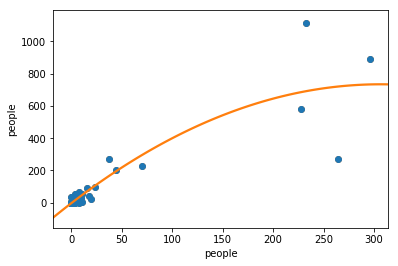

In [45]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
import seaborn as sns

df = csv_array_3d[people][ratio][seed].copy()
trainX = df['mobile'][time]['people'].copy()
trainY = df['census'][time]['people'].copy()

# plt.figure(dpi=600)
plt.xlabel('モバイル空間統計')
plt.ylabel('道路交通センサス')
plt.plot(trainX, trainY, 'o')

order=2
sns.regplot(x=trainX, y=trainY, order=order, ci=0)
z = np.polyfit(trainX, trainY, order)
z = np.squeeze(z)
p = np.poly1d(z)
print('y = ', p)
print('相関 = ', np.corrcoef(trainX, trainY)[0,1])
print('R^2 = ', r2_score(trainX, trainY))
p = np.asanyarray(p)

x = trainX
y = p[0]*x**2 + p[1]*x + p[2]


# plt.savefig('correlation_{0}.png'.format(people))